__4.1分类变量__

In [1]:
import pandas as pd

In [ ]:
# 4.1.1 one-hot编码
data_dummies = pd.get_dummies(train_data)


__4.2 分箱、离散化、线性模型与树__

In [ ]:
bins = np.linspace(-3,3,11)

which_bin = np.digitize(X,bins=bins)

In [ ]:
from sklearn.preprocessing import OneHotEncoder#与get_dummies类似，但只适用于值为整数的分类变量
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned  = encoder.transform(which_bin)#对特征进行分箱，线性模型变得更加灵活，但对于基于树的模型通常不会有更好的效果

__4.3 交互特征与多项式特征__

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10,include_bias=False)#多项式次数为10
X_poly = poly.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
print(poly.get_feature_names())#得到每个特征的指数（特征语义）

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [7]:
print(poly.get_feature_names())#得到每个特征的指数（特征语义）

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2).fit(X_train_scaled,y_train)
print(ridge.score(X_test_scaled,y_test))
ridge = Ridge(alpha=0.2).fit(X_train_poly,y_train)
print(ridge.score(X_test_poly,y_test))    #使用Ridge时，交互特征和特征多项式对性能有很大的提升，但对复杂模型，如随机森林和svm作用不大

0.633013773391
0.77486602856


__4.4 单变量非线性变换__

In [ ]:
#使用np.log1p对特征值进行处理,对于线性模型至关重要
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)



__4.5 自动化特征选择__

In [12]:
#4.5.1 单变量统计
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0,test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)

X_train_scaled = select.transform(X_train)

print(X_train.shape)
print(X_train_scaled.shape)


(284, 30)
(284, 15)


[ True False  True  True False  True  True  True False False  True False
  True  True False False False False False False  True False  True  True
 False  True  True  True False False]


Text(0.5,0,'Sample index')

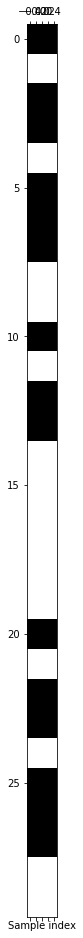

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

print(select.get_support())
plt.matshow(select.get_support().reshape(-1,1),cmap='gray_r')
plt.xlabel("Sample index")

In [21]:
#4.5.2 基于模型的特征选择
#用于特征选择的监督模型不需要与用于最终监督建模的模型相同
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="median") #使用中位数作为阈值

select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

X_test_l1 = select.transform(X_test)
print(LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test))  #特征选择效果更好

(284, 30)
(284, 15)
0.954385964912


[ True  True  True  True False False  True  True False False  True False
  True  True False False  True False False  True  True  True  True  True
  True  True  True  True  True False]


Text(0.5,0,'Sample index')

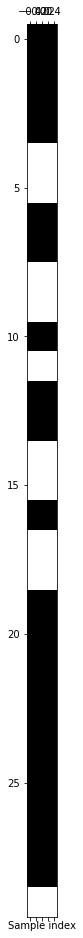

In [22]:
#4.5.3 迭代特征选择
#迭代特征消除（RFE）
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state=43),n_features_to_select=20)
select.fit(X_train,y_train)

print(select.get_support())
plt.matshow(select.get_support().reshape(-1,1),cmap='gray_r')
plt.xlabel("Sample index")

__4.6 利用专家知识__

In [25]:
import mglearn
citibike = mglearn.datasets.load_citibike()

Text(0,0.5,'Rentals')

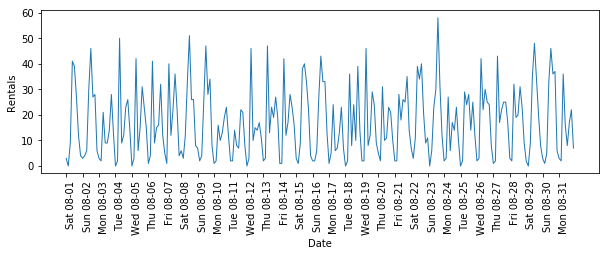

In [27]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start = citibike.index.min(),end = citibike.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime("%a %m-%d"),rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [56]:
y = citibike.values
# int(citibike.index.values[0])

X = citibike.index.astype("int").values.reshape(-1,1)

In [62]:
n_train=184

def eval_on_features(features,target,regressor):
    X_train,X_test = features[:n_train],features[n_train:]
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print(regressor.score(X_test,y_test))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8),xticks.strftime("%a %m-%d"),rotation=90,ha='left')
    
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label='test')
    plt.plot(range(n_train),y_pred_train,'--',label='prediction train')
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label='prediction test')
    plt.legend(loc=(1.01,0))
    plt.xlabel("Data")
    plt.ylabel("Rentals")

-0.035486463626


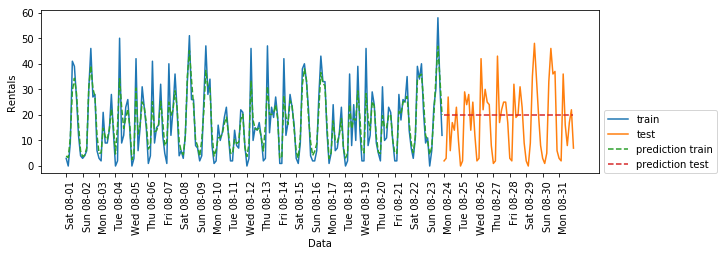

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(X,y,regressor)#使用随机森林不能外推，无法预测

0.599577599331


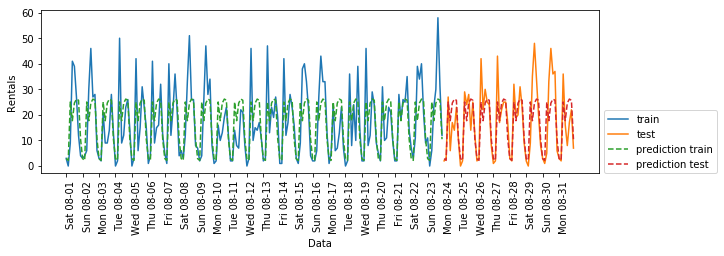

In [66]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)#删掉时间特征，仅仅增加每天的时刻

0.841948858797


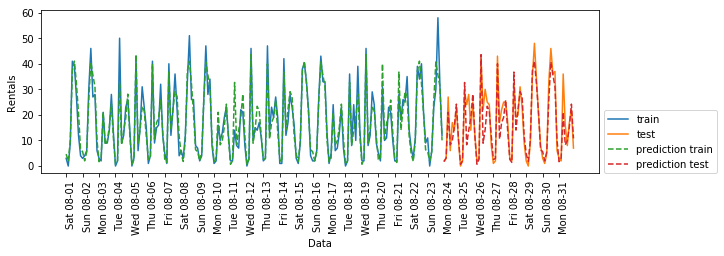

In [68]:
import numpy as np
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])#使用每天的时刻和星期几特征
eval_on_features(X_hour_week,y,regressor)#使用随机森林达到了最好结果

0.132041572622


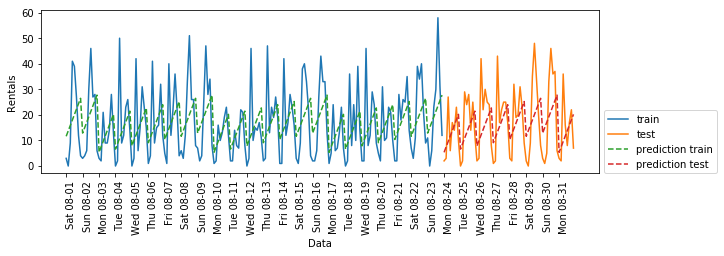

In [69]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())#使用线性模型，效果变差，因为他将整数解释为了连续变量

0.619113916866


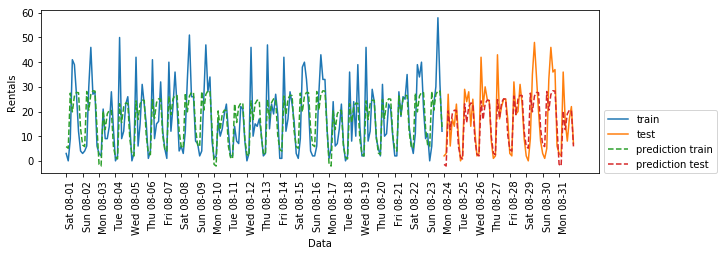

In [74]:
#使用分类变量
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_one_hot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_one_hot,y,Ridge())

0.845170635797


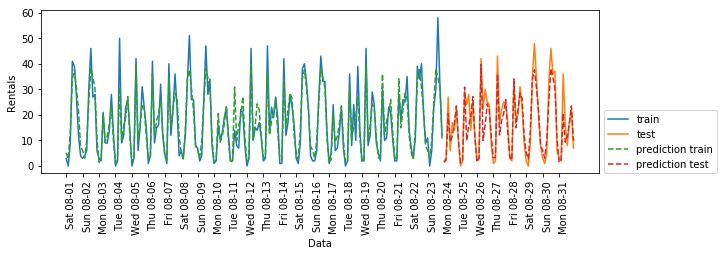

In [75]:
#利用交互特征
poly_transformer = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_one_hot_poly = poly_transformer.fit_transform(X_hour_week_one_hot)
lr = Ridge()
eval_on_features(X_hour_week_one_hot_poly,y,lr)
